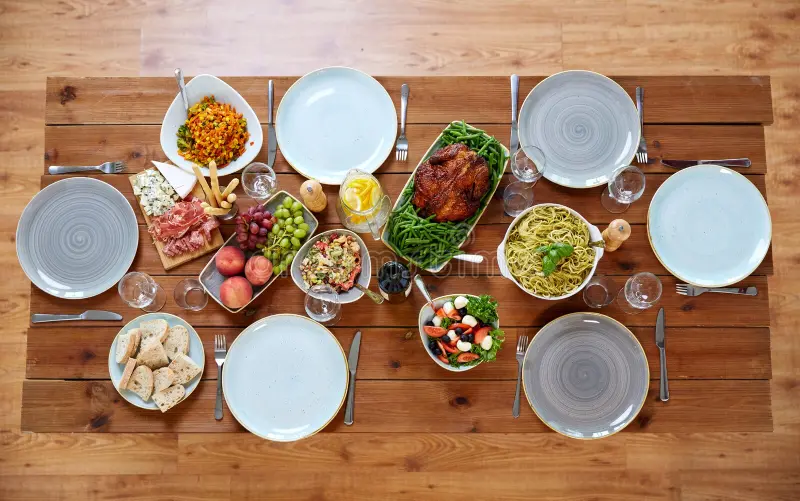

# Receipe Prediction for Tasty Bite Company

## About Tasty Bytes
 
Tasty Bytes is a well-established food service company that specializes in preparing and delivering a wide variety of freshly cooked and nutritious meals right to your doorstep, they leverages technology to provide a convenient and seamless dining experience for its customers. They are committed to providing convenience and healthy dining options for individuals with busy schedules or those who prefer the convenience of delivered meals.


### Problem Statement:

Tasty Bytes choose recipe from a selection and display that on the homepage. They noticed that traffic to the rest of the website goes up by as much as 40% if a popular recipe is picked. But they don’t know how to decide if a recipe will be popular at intervals. More traffic means more subscriptions so this is really important to the company. Therefore Tasty Bites Recipe want to make enhance recipe prediction that will generate high traffic into business website by 80% through machine learning. 

Tasty Bytes aim to develop a machine learning model that can accurately predict the taste and popularity of recipes based on a variety of factors, such as ingredients, cooking methods, and user interactions. The goal is to provide valuable insights to both home cooks and professional chefs, enabling them to create and share recipes that resonate with the preferences of their intended audience.

### Background:

With the proliferation of cooking websites, apps, and social media platforms dedicated to food and recipes, there is an overwhelming amount of culinary content available to users. However, not all recipes are created equal in terms of taste and popularity. Understanding what makes a recipe appealing and how it can be improved is a challenge that both novice and experienced cooks face. Tasty Bites aims to address this challenge by predicting the success of a recipe and helping users make data-driven decisions when creating and sharing their culinary creations.

### Key Components of the Problem:

Data Collection: To build an effective prediction model, we need access to a substantial dataset of recipes, including their ingredients, cooking instructions, user ratings, and reviews. Additionally, we may collect data on factors such as cuisine type, dietary restrictions, and cooking difficulty.

Feature Engineering: We will need to extract relevant features from the recipe data. This involves categorizing ingredients, quantifying cooking times, and encoding user interactions such as ratings, comments, and social media shares.

Machine Learning Model: The core of the project involves developing a machine learning model that can analyze the dataset and predict the overall taste and popularity of a recipe. This model may use techniques such as regression, classification, or natural language processing to achieve its predictions.


### Metrics for Success:

The success of the "Tasty Bites Recipe Prediction" project will be evaluated based on the following metrics:

Prediction Precisoin Score: The model's ability to accurately predict the taste and popularity of recipes that will generate high traffic by 80% into the website.

Recipe Improvements: The extent to which users are able to enhance their recipes based on the model's recommendations.

### Expected Impact:

The successful development and deployment of the Tasty Bites Recipe Prediction system can have a significant impact on the culinary community by providing valuable insights into what makes a recipe popular. It can empower both amateur and professional chefs to create and share recipes that cater to the tastes of their audience, resulting in improved culinary experiences and a stronger online culinary community.

### Challenges:

The project may face challenges related to data quality, model complexity, and user engagement. Ensuring that the data used for training the model is representative and reliable is crucial. Developing a model that accurately captures the complex factors contributing to a recipe's success is also a technical challenge. Moreover, encouraging user engagement and adoption of the system will require effective marketing and a user-friendly interface.

### Conclusion:

The "Tasty Bites Recipe Prediction" project aims to harness the power of data and machine learning to enhance the culinary experience for food enthusiasts and creators. By solving this problem, Tasty Bites seeks to provide a valuable platform for sharing and discovering delicious recipes while fostering a more informed and data-driven approach to cooking and recipe creation.


# Data Cleaning and Validation

The Recipe Dataset contains 947 rwos and 8 columns. I have validated all variables and made changes where necessary. The details are given below:

* recipe : 947 unique values with no missing values found, the variable is the same as description.
* calories : Numerical value with 52 missing values found, the missing value was filled with the median value of the variable to              aviod outliers.
* carbohydrate : Numerical value with 52 missing value found, the missing value was filled with the median value of the variable                  to aviod outliers.
* sugar :  Numerical value with 52 missing value found, the missing value was filled with the median value of the variable                  to aviod outliers.
* protein : Numerical value with 52 missing value found, the missing value was filled with the median value of the variable                 to aviod outliers.
* category : 11 categories instead of 10, with no missing values. I used replace function to change the "Chicken Breast" category to "Chicken" category.   
* servings : Not the same as description, it was an object data type, I converted it to an integer data type using the astype function.
* high_traffic : 1 category with 373 missing values, the missing values was filled with "Not High" variable.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Importign libraries for model development
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold 

In [2]:
# Importing the data
data = pd.read_csv("recipe_site_traffic_2212 (1).csv")
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [3]:
# Checking the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [4]:
def data_cleaning(data):
    
    """
    paramneters:
    -----------
        data : This is a dataframe set fo data.
        
    output :
    -------
    It is to return data with no missing values and all data validation checked and corrected.
    """
    data["calories"].fillna(data["calories"].median(), inplace = True)
    data["carbohydrate"].fillna(data["carbohydrate"].median(), inplace = True)
    data["sugar"].fillna(data["sugar"].median(), inplace = True)
    data["protein"].fillna(data["protein"].median(), inplace = True)
    data["category"].replace({"Chicken Breast" : "Chicken"}, inplace = True)
    data["high_traffic"].fillna("Not High", inplace = True)
    data["servings"].replace({
                    "4 as a snack" : "4",
                    "6 as a snack" : "6"
            }, inplace = True)

    data["servings"] = data["servings"].astype(int)
    
    return data
data = data_cleaning(data = data)
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,288.55,21.48,4.55,10.80,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Not High
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Not High



# Explanatory Analysis

The target variable is the high_traffic column since we are predicting which recipe is will lead to high traffic.

**Target Varible**

The high_traffic column is the target variable, and from the graph below we can see that High has the highest count and also the target variable is balanced, in whcih the High contains 61% of the data while Not High contains 39% of the data. Whichi indicate that this is a balance data.

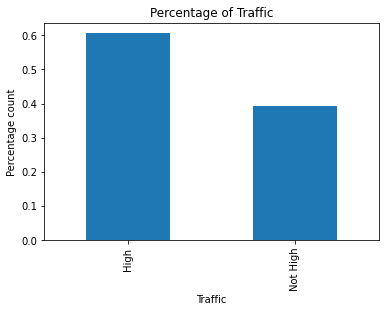

In [5]:
#percentage of the number of highs and not highs
data["high_traffic"].value_counts(normalize = True).plot(kind = "bar", xlabel="Traffic" , ylabel = "Percentage count", title = "Percentage of Traffic");

# Categorical variables

From Graph 2.1, we can conclude that Vegetable has the highest number of high traffic followed by Potato while Beverages has the higest number of Not high traffic follwed by Breakfast.

Given a threashold of food category giving 50% and above high traffic, which are vegetable, potato, pork, meat, one dish meal, lunch/snacks and dessert. These are the popular food category given their nutrients that generate more traffic into tasty bytes website. This high traffic happens by manually detecting which food will generate high traffic.

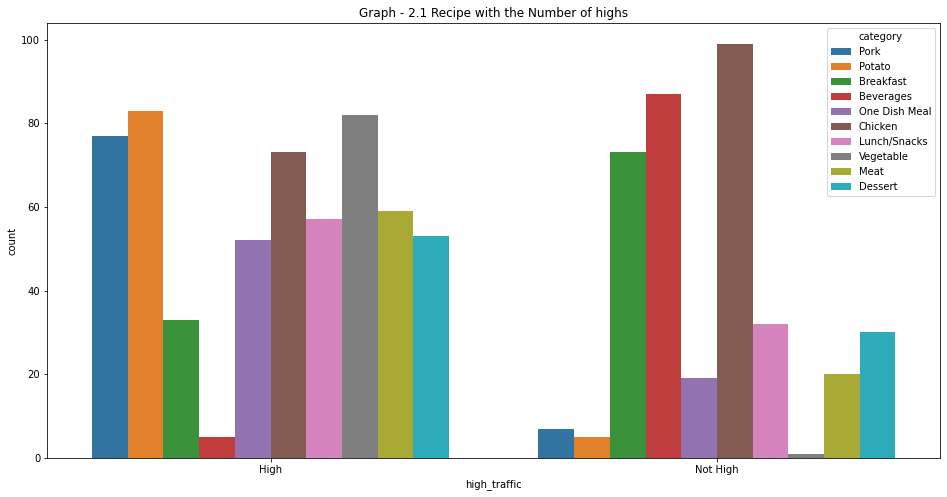

In [6]:
# plot of the category with the high_traffic
fig, ax = plt.subplots(figsize = (16, 8))
sns.countplot(x = "high_traffic", data = data, ax = ax, hue = "category")
plt.title("Graph - 2.1 Recipe with the Number of highs");

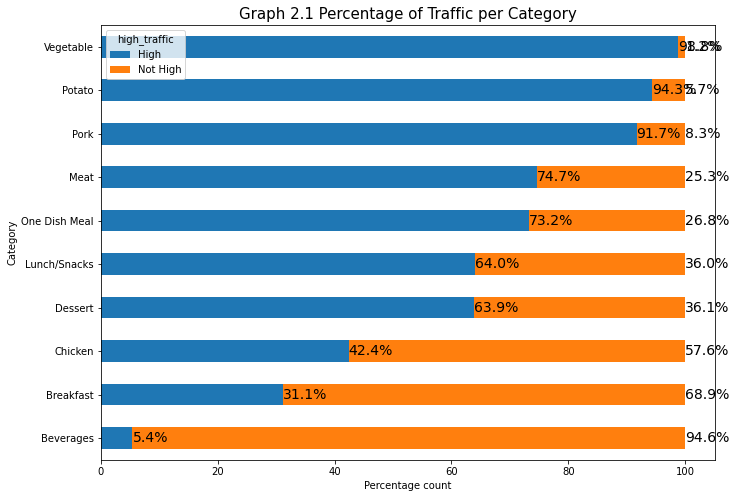

In [7]:
# performing a percentage count of each recipe with the target variable
# Grouping the data by category and converting to dataframe
dt_group = data.groupby("category")["high_traffic"].value_counts(normalize = True).to_frame("percentage").reset_index()

# Pivoting the grouped data
pivot_df = dt_group.pivot(index="category", columns = "high_traffic", values="percentage").reset_index()

# Renaming the index of the pivot data
pivot_df.index.rename("index", inplace=True)

# Sorting the pivot data according to high in ascending order
pivot_df = pivot_df.sort_values(["High"], ascending=True)
pivot_df = pivot_df.reset_index().drop("index", axis=1)

# plotting a stacked horizontal bar chart forthe pivot data
fig, ax = plt.subplots(figsize= (11, 8))
plots = pivot_df.plot(kind = "barh", stacked = True, ax = ax)

# Iterating over the stacked horizontal barchart to fill in the percentage values
for bars in plots.containers:
        plots.bar_label(bars, labels=[f"{c}%" for c in np.round(bars.datavalues * 100, 1)],
                      padding=0.000001,color="black", fontsize=14)
ax.set_yticks([0,1,2,3,4,5,6,7,8,9],pivot_df["category"])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.xlabel("Percentage count")
plt.ylabel("Category")
plt.title("Graph 2.1 Percentage of Traffic per Category", size = 15);

In [8]:
dt_group

,category,high_traffic,percentage
0,Beverages,Not High,0.945652
1,Beverages,High,0.054348
2,Breakfast,Not High,0.688679
3,Breakfast,High,0.311321
4,Chicken,Not High,0.575581
5,Chicken,High,0.424419
6,Dessert,High,0.638554
7,Dessert,Not High,0.361446
8,Lunch/Snacks,High,0.640449
9,Lunch/Snacks,Not High,0.359551


# Numerical Variables - recipe, calories, carbohydrate, protein, sugar and servings

#### From the correlation graph below, we can conclude that there is no strong positive or egative correlation between the numerical varibales.

#### From the Density plot, we can conclude that calories, carbohydrate, proteins and sugar are positive skewed to the right which depict that each of those columns has outliers. The recipe column follow a normal distribution which may be because it has unoque values. While the servings variable is trimodal variable.

#### From the Scatter Plot, we can deduce that there are weak correlations between the numerical variables

#### From the boxplot, we can see that none of the numerical variables has a strong relationship with the Traffic Variable because all the boxplot in each graph does overlap which indicate less association.

#### From the heatmap below we can see that only the Recipe Category has a moderate but negative correlation with Traffic.

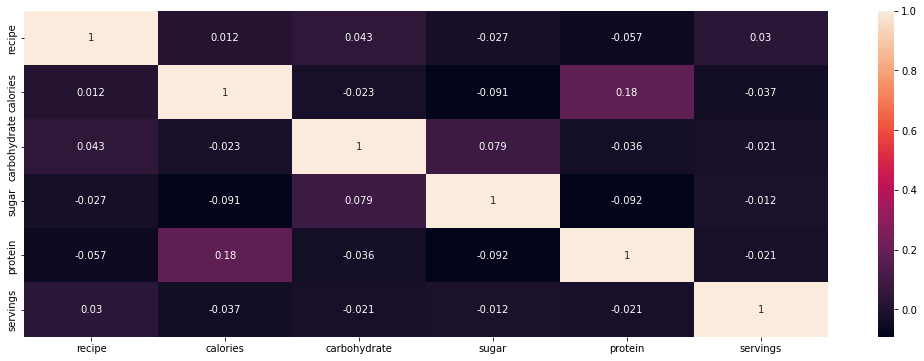

In [9]:
# plotting the correlation data
corr = data.corr()
fig, ax = plt.subplots(figsize = (18, 6))
sns.heatmap(corr, annot = True, ax = ax);

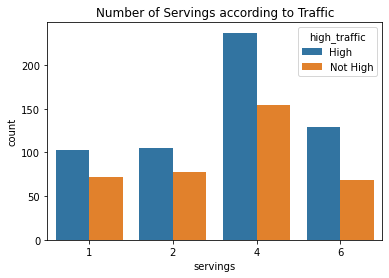

In [10]:
# ploting a count plot for the serivings and subgrouping with the traffic column
sns.countplot(x = "servings", data = data, hue = "high_traffic")
plt.title("Number of Servings according to Traffic")
plt.savefig("servings.png");

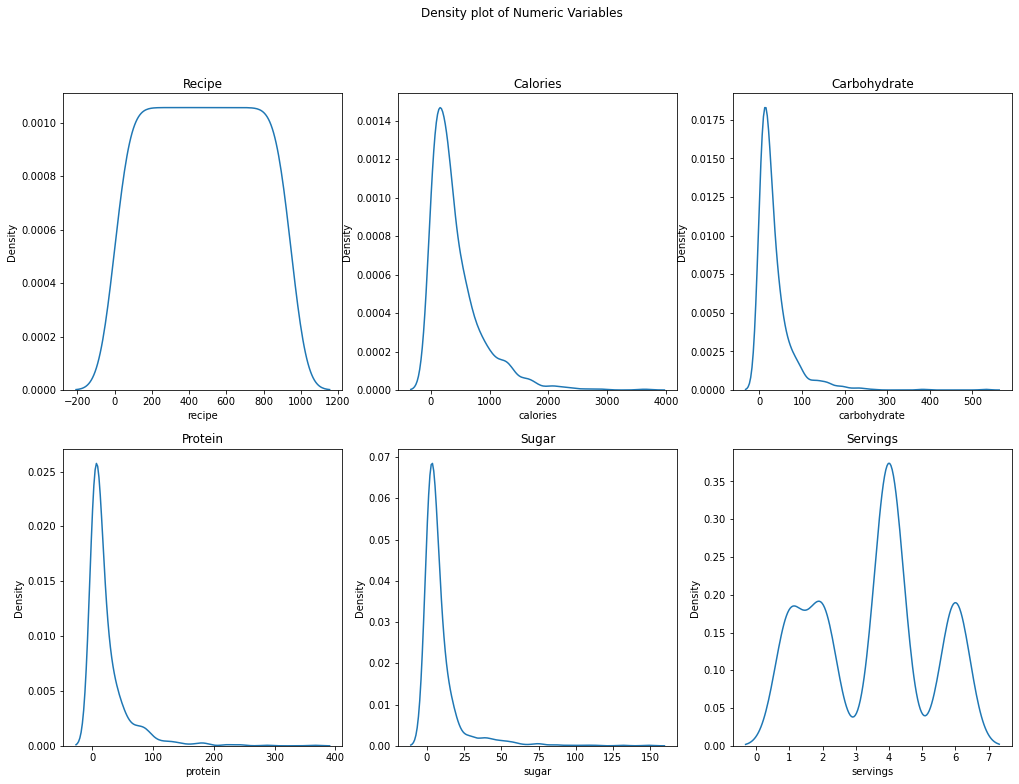

In [11]:
# Plotting the density plot of numerical columns to attest the shape or behaviour of the columns
fig, ax = plt.subplots(2,3, figsize = (17, 12))
sns.kdeplot(x= 'recipe', data = data, ax = ax[0,0])
ax[0,0].set_title("Recipe")

sns.kdeplot(x= 'calories', data = data, ax = ax[0,1])
ax[0,1].set_title("Calories")

sns.kdeplot(x= 'carbohydrate', data = data, ax = ax[0,2])
ax[0,2].set_title("Carbohydrate")

sns.kdeplot(x= 'protein', data = data, ax = ax[1,0])
ax[1, 0].set_title("Protein")

sns.kdeplot(x= 'sugar', data = data, ax = ax[1,1])
ax[1,1].set_title("Sugar")

sns.kdeplot(x= 'servings', data = data, ax = ax[1,2])
ax[1,2].set_title("Servings")

plt.suptitle("Density plot of Numeric Variables")

fig.savefig("DensityPlot.png");

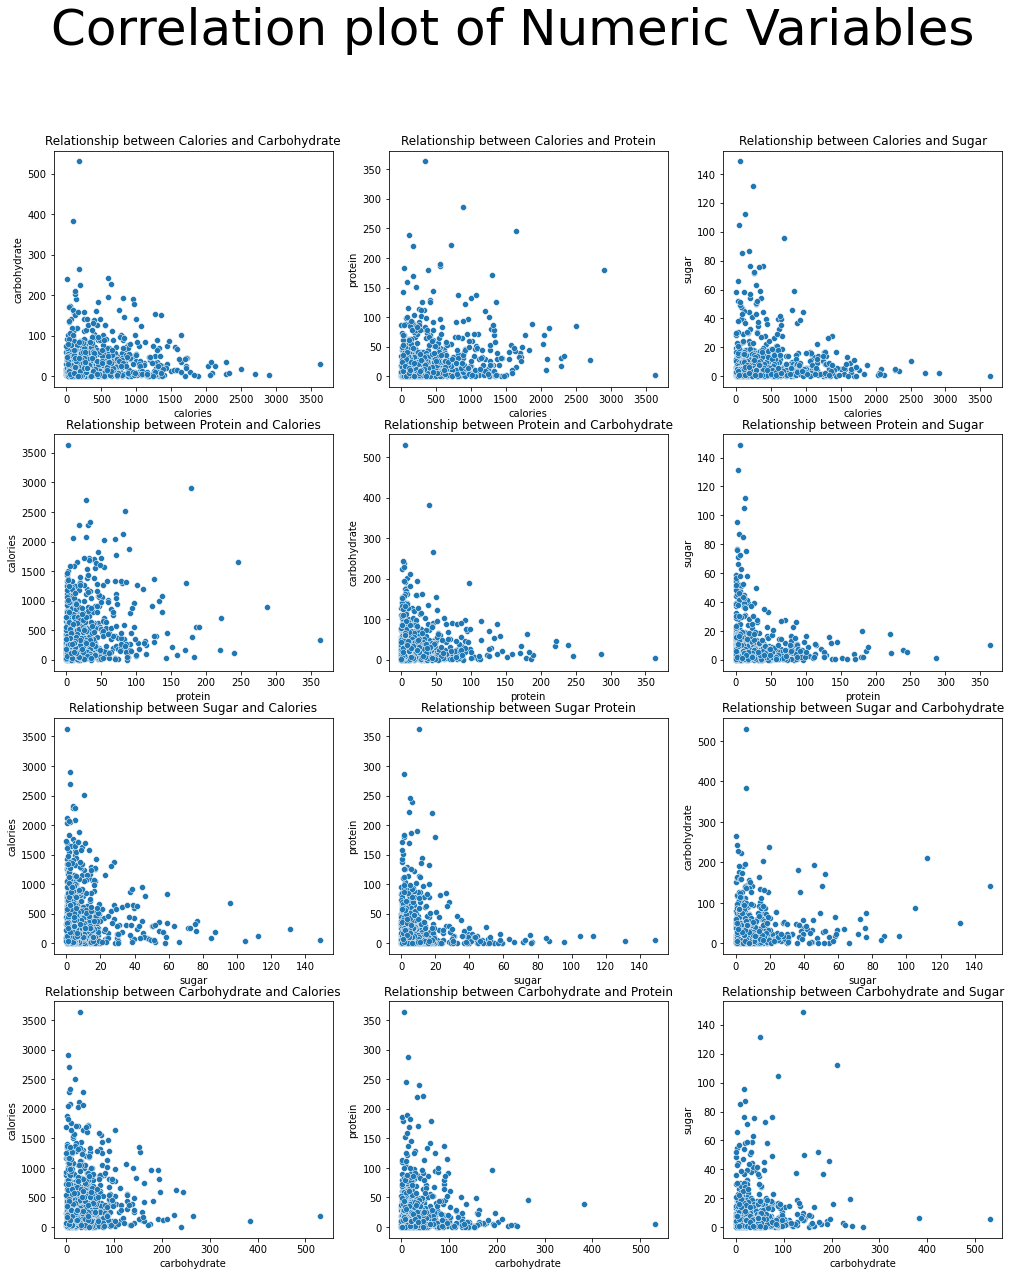

In [12]:
# Plottingthe correlations between the numerical columns
fig, ax = plt.subplots(4,3, figsize = (17, 20))
sns.scatterplot(x= 'calories', y = "carbohydrate", data = data, ax = ax[0,0])
ax[0,0].set_title("Relationship between Calories and Carbohydrate")

sns.scatterplot(x= 'calories', y = "protein", data = data, ax = ax[0,1])
ax[0,1].set_title("Relationship between Calories and Protein")

sns.scatterplot(x= 'calories', y = "sugar", data = data, ax = ax[0,2])
ax[0,2].set_title("Relationship between Calories and Sugar")

sns.scatterplot(x= 'protein', y = "calories", data = data, ax = ax[1,0])
ax[1, 0].set_title("Relationship between Protein and Calories")

sns.scatterplot(x= 'protein', y = "carbohydrate", data = data, ax = ax[1,1])
ax[1,1].set_title("Relationship between Protein and Carbohydrate")

sns.scatterplot(x= 'protein', y = "sugar", data = data, ax = ax[1,2])
ax[1,2].set_title("Relationship between Protein and Sugar")

sns.scatterplot(x= "sugar", y = "calories", data = data, ax = ax[2,0])
ax[2,0].set_title("Relationship between Sugar and Calories")

sns.scatterplot(x= "sugar", y = 'protein', data = data, ax = ax[2,1])
ax[2,1].set_title("Relationship between Sugar Protein")

sns.scatterplot(x= "sugar", y = 'carbohydrate', data = data, ax = ax[2,2])
ax[2,2].set_title("Relationship between Sugar and Carbohydrate")

sns.scatterplot(x= "carbohydrate", y = "calories", data = data, ax = ax[3,0])
ax[3,0].set_title("Relationship between Carbohydrate and Calories")

sns.scatterplot(x= "carbohydrate", y = "protein", data = data, ax = ax[3,1])
ax[3,1].set_title("Relationship between Carbohydrate and Protein")

sns.scatterplot(x= "carbohydrate", y = "sugar", data = data, ax = ax[3,2])
ax[3,2].set_title("Relationship between Carbohydrate and Sugar")


plt.suptitle("Correlation plot of Numeric Variables", fontsize = 50);

### Relationship between high_traffic and the Numerical Variables

* From the box plot, we can conclude that there is little to no relationship between the numerical variables and the traffic variable.

* From the correlation map, after converting the category variable to numeric varibale, we can conclude that only the category variable has a strong negative correlation with the traffic variable.

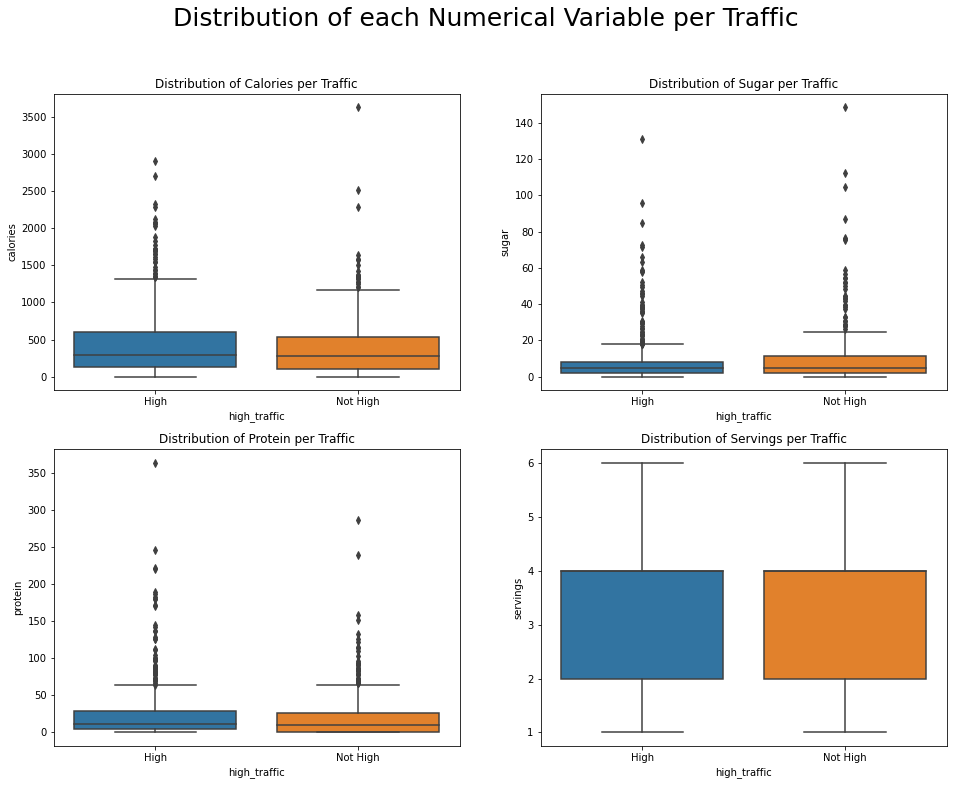

In [13]:
# Plotting to attest the distribution of numerical columns with the traffic
fig, ax = plt.subplots(2,2, figsize = (16, 12))
sns.boxplot(x = "high_traffic", y = "calories", data = data, ax = ax[0,0])
ax[0,0].set_title("Distribution of Calories per Traffic")

sns.boxplot(x = "high_traffic", y = "sugar", data = data, ax = ax[0,1])
ax[0,1].set_title("Distribution of Sugar per Traffic")

sns.boxplot(x = "high_traffic", y = "protein", data = data, ax = ax[1,0])
ax[1,0].set_title("Distribution of Protein per Traffic")

sns.boxplot(x = "high_traffic", y = "servings", data = data, ax = ax[1,1])
ax[1,1].set_title("Distribution of Servings per Traffic")

plt.suptitle("Distribution of each Numerical Variable per Traffic", fontsize = 25, fontweight = 100);

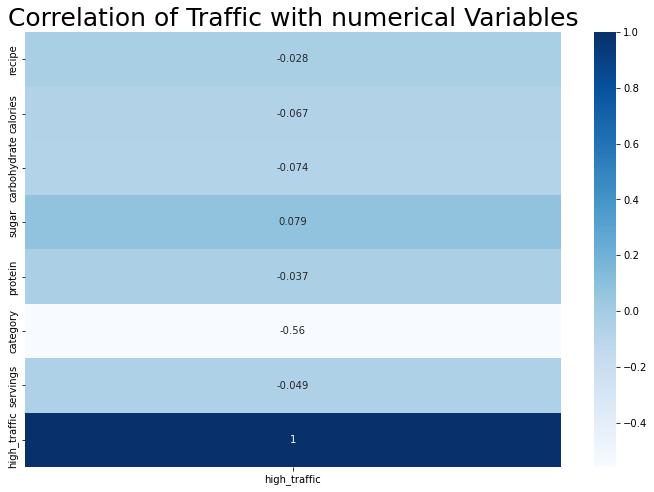

In [14]:
# copying the data
dt = data.copy()

# Transforming object data to numerical columns
dt["high_traffic"] = dt["high_traffic"].map({"High" : 0, "Not High" : 1})
dt["category"]= LabelEncoder().fit_transform(dt["category"])


# Corrletion of the data
corr = dt.select_dtypes(include= "number").corr()[7:8].T

# plotting correlation map of each columns with the traffic column
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True, cmap = "Blues")
plt.title("Correlation of Traffic with numerical Variables", fontsize = 25)

plt.savefig("Correlation percent.png");

# Model Development and Evaluation

**Predicting the recipe that will lead to high traffic is a Classification problem. I will be using KNeighbor Classifier (SVC) model as the base model and Extreme Gradient boosting (XGB) Classifier as the comparison model.**

**Precision Score will be used for the model evaluation since we are to predict the recipe with hight traffic which is the positive rate**

## Data Preprocessing
* Converted Categorical variables to numerical variable.
* Divided the data into train and test set.
* Separated the features from the target variable.
* Scale the numeric variables to remove outliers
* Dropped the Recipe vairable because it has unique colums which is not useful to our model

In [15]:
# Indicating the features data
X = data.drop(columns = ["recipe", "high_traffic"], axis = 1)

# Initializing the traget class
y = LabelEncoder().fit_transform(data["high_traffic"])

# Attesing the shape of the features and targe data
X.shape, y.shape

((947, 6), (947,))

In [16]:
# Divding the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((757, 6), (190, 6), (757,), (190,))

In [17]:
# Findign the best n_neighbors
score = []
def k_neighbors(df):
    df["category"] = LabelEncoder().fit_transform(df["category"])
    df["high_traffic"] = LabelEncoder().fit_transform(df["high_traffic"])
    
    X = df.drop(["recipe", "high_traffic"], axis = 1)
    y = df["high_traffic"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
    for i in range(1, 50, 5):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        y_pred1 = knn.predict(X_test)
        scores = precision_score(y_test, y_pred1)
        score.append(scores)
    return score

In [18]:
knn_neighbors = k_neighbors(df = dt)

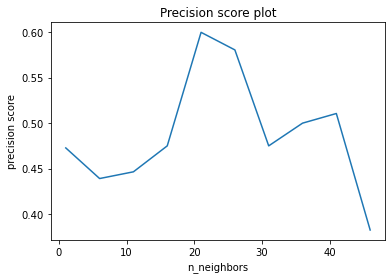

In [19]:
n = np.arange(1, 50, 5)

k_score = pd.Series(knn_neighbors)
n_neighbors = pd.Series(n)
k_dict = {"n_neighbors" : n_neighbors,
          "scores" : k_score}
k_data = pd.DataFrame(k_dict)

# line plot
plt.plot(k_data["n_neighbors"], k_data["scores"])
plt.xlabel("n_neighbors")
plt.ylabel("precision score")
plt.title("Precision score plot");

In [20]:
set_config(display= "diagram") # set config for the pipeline diagram
knn_model = make_pipeline(OneHotEncoder(use_cat_names=True), StandardScaler(),
                    KNeighborsClassifier(n_neighbors= 21)) # build knn model
knn_model

Pipeline(steps=[('onehotencoder', OneHotEncoder(use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=21))])

In [21]:
knn_model.fit(X_train, y_train) #fit the model
knn_pred = knn_model.predict(X_test) # make new prediction


# Evaluating various score to test for the performance of the knn_model
knn_score = f1_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred)
knn_acc = accuracy_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)

# Print the various scores of the model
print(f"The F1 Score for knn model is {np.round(knn_score, 2)}")
print(f"The Precision Score for knn model is {np.round(knn_prec, 2)}")
print(f"The  Accuracy Score for knn model is {np.round(knn_acc, 2)}")
print(f"The Recall Score for knn model is {np.round(knn_recall, 2)}")

The F1 Score for knn model is 0.67
The Precision Score for knn model is 0.73
The  Accuracy Score for knn model is 0.75
The Recall Score for knn model is 0.62


In [22]:
cm_knn = confusion_matrix(y_test, knn_pred, labels = knn_model.classes_)
cm_knn

array([[95, 18],
       [29, 48]], dtype=int64)

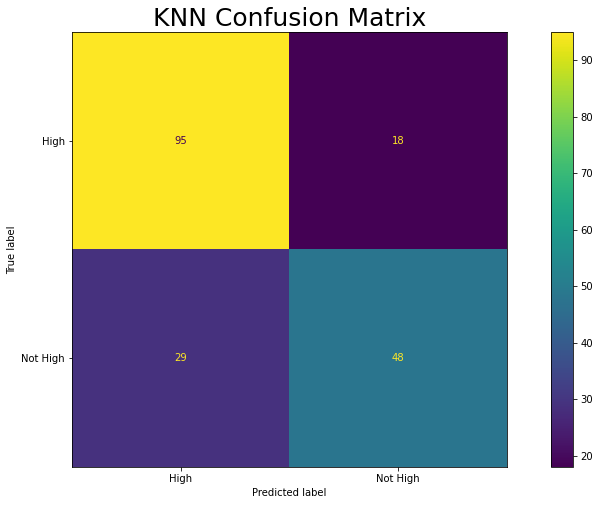

In [23]:
# Plotting Confusion matrix of the model
conf_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels = ["High", "Not High"])
fig, ax = plt.subplots(figsize = (16, 8))
conf_knn.plot(ax=ax)
plt.title("KNN Confusion Matrix", size = 25);

# XGB Model Development

In [24]:
# model development
set_config(display= "diagram")
xgb_model = make_pipeline(OneHotEncoder(use_cat_names=True), StandardScaler(),
                    XGBClassifier(n_estimators = 30, learning_rate = 0.07, max_depth = 4, n_jobs = -1, max_delta_step = 1.5))
xgb_model

Pipeline(steps=[('onehotencoder', OneHotEncoder(use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.07,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=1.5,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=30, n_jobs=-1,
                               num_parallel_tree=None, random_state=None, ...))])

In [25]:
xgb_model.fit(X_train, y_train) #fit the model
xgb_pred = xgb_model.predict(X_test) # make new prediction

# Evaluating various score to test for the performance of the model
xgb_score = f1_score(y_test, xgb_pred)
xgb_prec = precision_score(y_test, xgb_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)

# Print the various scores of the model
print(f"The F1 Score for xgb model is {np.round(xgb_score, 2)}")
print(f"The Precision Score for xgb model is {np.round(xgb_prec, 2)}")
print(f"The  Accuracy Score for xgb model is {np.round(xgb_acc, 2)}")
print(f"The Recall Score for xgb model is {np.round(xgb_recall, 2)}")

The F1 Score for xgb model is 0.65
The Precision Score for xgb model is 0.76
The  Accuracy Score for xgb model is 0.75
The Recall Score for xgb model is 0.57


In [26]:
# Performing confusion matix on the model
cm_xgb = confusion_matrix(y_test, xgb_pred, labels = xgb_model.classes_)
cm_xgb

array([[99, 14],
       [33, 44]], dtype=int64)

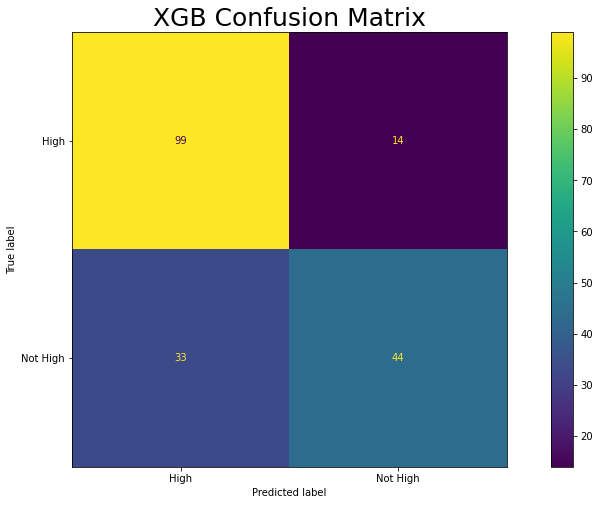

In [27]:
# Plotting Confusion matrix of the model
conf_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels = ["High", "Not High"])
fig, ax = plt.subplots(figsize = (16, 8))
conf_xgb.plot(ax=ax)
plt.title("XGB Confusion Matrix", size = 25);

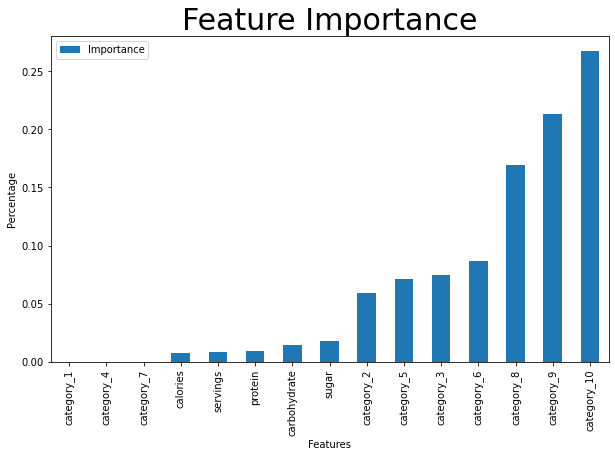

In [28]:
# Plotting the feature importance of the model
coef_xgb = xgb_model.named_steps["xgbclassifier"].feature_importances_
fea_importance = pd.DataFrame({'Feature': OneHotEncoder().fit_transform(X).columns, 'Importance': coef_xgb})
fea_importance = fea_importance.sort_values('Importance', ascending=True)
fea_importance.plot(x='Feature', y='Importance', kind='bar', figsize=(10, 6))
plt.ylabel("Percentage")
plt.xlabel("Features")
plt.title("Feature Importance", size = 30);

# Business Metric to Monitor

### Since the project is to correctly predict the recipe with high traffic, the Business metric to monitor is the Precision Score.

### Precision Score is the ratio of the value predicted as positive that where actually positive.
##  Precision Score = tp / (tp + fp)
###  where tp = true positive and fp = false positive**

* From the table below, we can see that Xgb model gave a precision score of 76% which is closer to the instructions of predicting recipe of 80% high traffic, while KNN model gave a precision score of 72%.

In [29]:
# Tabularizing the svc and xgb models
table = {"KNN_Model" : {"Accuracy Score" : knn_acc,
                         "F1 Score" : knn_score,
                         "Precision Score" : knn_prec,
                         "Recall Score" : knn_recall},
          "XGB_Model" : {"Accuracy Score" : xgb_acc,
                         "F1 Score" : xgb_score,
                         "Precision Score" : xgb_prec,
                         "Recall Score" : xgb_recall}
         }
         
dt_score = pd.DataFrame(table)
dt_score

,KNN_Model,XGB_Model
Accuracy Score,0.752632,0.752632
F1 Score,0.671329,0.651852
Precision Score,0.727273,0.758621
Recall Score,0.623377,0.571429


# Final Summary and Recommedation

## Relationship bewteen the Features and the Target variables

#### * I discovered that only the category variable has a high relationship with the target variable, all other features has little or no relationship with the target variable. This can be seen from the EDA and also from the model feature importance.

## Evaluation
#### The business wnat us to evaluate the recipe with high traffic 80% of the time. 
#### * Using the Precision Score formular both model predicted the recipe with high traffic more that 80% on new data.

# Recommedation

* I recommend that the model should be deployed and automated since is met up with the business value. This will aid easy reusability.
* Other features should be added to the data to improve the model, features such as:
    * Cooking Time Taken: "2 hours"
    * Ingreduent : "Tomatoes, Onion"
    * Delivery time : "30 mins"
    * Price of meal : "$10"
    * Ordering meal time : "2:30pm"
